In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Basic

## 그래프 만들기


In [22]:
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]),name='weight')
b= tf.Variable(tf.random_normal([1]),name='bias')

#Model

hypothesis = x_train*W +b

## cost

In [23]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

## Minimize

In [24]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## Launch the graph in a Session

In [25]:
sess= tf.Session()

## Initialize global Variables

In [26]:
sess.run(tf.global_variables_initializer())

## Fit the line

In [27]:
for step in range(2001):
    sess.run(train)
    if step %20 ==0:
        print(step,sess.run(cost), sess.run(W), sess.run(b))

0 15.7166 [-1.03046095] [ 0.45979571]
20 0.308263 [ 0.37889725] [ 1.01618886]
40 0.153345 [ 0.53319871] [ 1.02346849]
60 0.138122 [ 0.56704974] [ 0.98060971]
80 0.125434 [ 0.58853126] [ 0.93502361]
100 0.113921 [ 0.60797679] [ 0.89112842]
120 0.103465 [ 0.62641066] [ 0.84925324]
140 0.0939688 [ 0.64396894] [ 0.80934203]
160 0.0853439 [ 0.6607011] [ 0.77130604]
180 0.0775107 [ 0.67664695] [ 0.73505747]
200 0.0703965 [ 0.69184333] [ 0.70051241]
220 0.0639352 [ 0.70632565] [ 0.66759086]
240 0.058067 [ 0.72012722] [ 0.63621664]
260 0.0527374 [ 0.73328012] [ 0.6063168]
280 0.047897 [ 0.74581504] [ 0.57782221]
300 0.0435008 [ 0.75776076] [ 0.55066675]
320 0.0395081 [ 0.76914513] [ 0.52478749]
340 0.0358819 [ 0.77999443] [ 0.50012434]
360 0.0325885 [ 0.79033393] [ 0.47662032]
380 0.0295974 [ 0.80018747] [ 0.45422095]
400 0.0268809 [ 0.80957788] [ 0.4328742]
420 0.0244136 [ 0.81852698] [ 0.41253069]
440 0.0221728 [ 0.82705569] [ 0.39314327]
460 0.0201377 [ 0.83518332] [ 0.37466699]
480 0.01828

In [29]:
sess.close()

# 2. Placeholder and Variable

In [37]:
W= tf.Variable(tf.random_normal([1]),name='weight')
b= tf.Variable(tf.random_normal([1]),name= 'bias')
X= tf.placeholder(tf.float32,shape=[None])
Y= tf.placeholder(tf.float32,shape=[None])

hypothesis = X*W + b          

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer =tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val,_ = sess.run([cost,W,b,train],feed_dict={X:[1,2,3],Y:[1,2,3]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)


0 2.7322 [ 0.06618266] [ 0.60287923]
20 0.118265 [ 0.59060198] [ 0.78593343]
40 0.0859838 [ 0.65559816] [ 0.7691257]
60 0.0778977 [ 0.67614067] [ 0.73489624]
80 0.0707461 [ 0.6917758] [ 0.70054126]
100 0.0642527 [ 0.70630074] [ 0.66763574]
120 0.0583554 [ 0.72010726] [ 0.63626093]
140 0.0529993 [ 0.73326153] [ 0.60635918]
160 0.0481348 [ 0.74579728] [ 0.57786256]
180 0.0437168 [ 0.7577439] [ 0.55070508]
200 0.0397043 [ 0.76912898] [ 0.52482396]
220 0.0360601 [ 0.77997905] [ 0.50015932]
240 0.0327503 [ 0.79031926] [ 0.47665361]
260 0.0297444 [ 0.80017358] [ 0.45425254]
280 0.0270143 [ 0.80956465] [ 0.43290433]
300 0.0245348 [ 0.81851441] [ 0.41255942]
320 0.0222829 [ 0.82704347] [ 0.39317065]
340 0.0202377 [ 0.83517188] [ 0.37469307]
360 0.0183802 [ 0.84291822] [ 0.35708389]
380 0.0166932 [ 0.85030043] [ 0.34030229]
400 0.015161 [ 0.85733581] [ 0.32430935]
420 0.0137695 [ 0.86404049] [ 0.30906796]
440 0.0125057 [ 0.87043005] [ 0.29454294]
460 0.0113579 [ 0.87651932] [ 0.2807005]
480 0.0

# 3. 차트 그리기

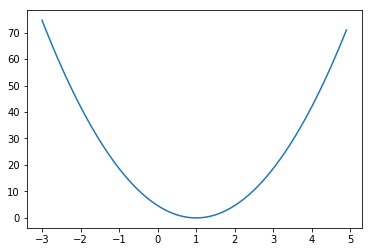

In [44]:
W= tf.placeholder(tf.float32)
X= [1,2,3]
Y= [1,2,3]

hypothesis = X*W       

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess= tf.Session()
sess.run(tf.global_variables_initializer())


W_val=[]
cost_val =[]

for i in range(-30,50):
    feed_W= i * 0.1
    curr_cost, curr_W = sess.run([cost,W],feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()


## 경사도 하강법